In [1]:
%matplotlib inline

# Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import  linear_model
import seaborn as sns


import math
np.set_printoptions(precision=3)
plt.rcParams.update({'font.size': 22})
path_X = "../Project2/action.csv"
oX = pd.read_csv(path_X)
path_Y = "../Project2/alert.csv"
oY = pd.read_csv(path_Y)

X = oX.copy()
Y = oY.copy()

In [5]:
attack_names_map = {"Continue":0,"Ping Scan":1,"Install tools":2,"DVWA SQL Injection Exploit":3,"Network service login":4,"Sambacry Explolit":5}
X = X.replace(attack_names_map)
X

,0,1,2,3,4,5,6,7,8,9
0,0,1,5,4,2,1,3,4,2,1
1,0,0,0,1,5,4,2,1,3,4
2,0,0,1,5,4,2,1,3,4,2
3,0,0,0,0,0,0,0,0,1,5
4,0,1,5,4,2,1,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...
1995,0,1,5,4,2,1,3,4,2,1
1996,0,0,0,1,5,4,2,1,3,4
1997,0,0,0,1,5,4,2,1,3,4
1998,0,0,1,5,4,2,1,3,4,2


In [2]:
#Divide the alert in k clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.DataFrame(columns=['attack','alert',"timestep"])
count = 0
rows_list = []
unique_values = set()
for index, row in X.iterrows():
    
    for col, value in row.items():
        rows_list.append({"attack": value,"alert":Y.iloc[index][col],"timestep":col})
        unique_values.add(Y.iloc[index][col])

best_model = None
best_score = 0
clusters = 0
np_unique = np.array(list(unique_values))

for i in range(6,10):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto')
    kmeans.fit(np_unique.reshape(-1, 1))
    score = silhouette_score(np_unique.reshape(-1,1), kmeans.labels_, metric='euclidean')
    p_score = '{:.2e}'.format(score)
    print(f"{i}&{p_score}\\\ ")
        
     
    if score > best_score:
        best_model = kmeans
        best_score = score
        clusters = len(kmeans.cluster_centers_)



print(best_score)
print(clusters)





6&6.22e-01\\ 
0.6218135644755878
6


In [4]:
print(best_model.cluster_centers_)
np.set_printoptions(threshold=np.inf)

print(len(np_unique))

[[ 7540.677]
 [12784.265]
 [ 4430.956]
 [15270.432]
 [ 9887.474]
 [ 2262.725]]
6672


In [3]:
mapping = {}
Y = oY.copy()
pred = best_model.predict(np_unique.reshape(-1,1))
for i,x in enumerate(np_unique):
    mapping[x] = pred[i]
#print(len(mapping))
Y= Y.replace(mapping)
    
    

In [6]:
print(Y)

      0  1  2  3  4  5  6  7  8  9
0     5  0  5  5  2  1  5  5  5  1
1     5  5  5  4  5  5  5  3  5  5
2     2  5  4  2  5  5  1  5  5  5
3     5  5  5  5  5  5  5  5  0  5
4     5  0  5  5  2  1  5  5  2  1
...  .. .. .. .. .. .. .. .. .. ..
1995  5  0  2  5  2  3  5  5  5  1
1996  5  5  5  4  5  5  2  3  5  5
1997  2  5  5  0  5  5  5  1  5  5
1998  5  5  0  2  5  2  3  5  5  2
1999  5  5  0  5  5  5  3  5  5  5

[2000 rows x 10 columns]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [7]:
def compute_successive_event_probability(X_train):
    trans = pd.DataFrame(columns=['0','1',"2","3","4","5"])
    row_list = []
    for i in range(0,6):
        row_i = {}
        for j in range(0,6):
            count_i_followed_by_j = 0
            count_i_occurrences = 0

            for idx,(index,row) in enumerate(X_train.iterrows()):
                
                for col, value in row.items():
                    if X_train.iloc[idx][col] == i and int(col) < 9:
                        count_i_occurrences+=1
                        if   X_train.iloc[idx][str(int(col)+1)]==j:
                            count_i_followed_by_j+=1
            if count_i_occurrences == 0:
                row_i[j]=0
            else:
                row_i[j]= count_i_followed_by_j / count_i_occurrences
            #print(f"A[{i},{j}] = {row_i[j]}")
        print(row_i)
        row_list.append(row_i)
    
                
    trans = pd.DataFrame(row_list)  
    return trans

trans = compute_successive_event_probability(X_train)

print(trans)
    

{0: 0.6249665148673988, 1: 0.37503348513260115, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.4592037839968467, 4: 0.0, 5: 0.5407962160031533}
{0: 0.0, 1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 0.0}
{0: 0.0, 1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0, 5: 0.0}
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 1.0, 5: 0.0}
          0         1    2         3    4         5
0  0.624967  0.375033  0.0  0.000000  0.0  0.000000
1  0.000000  0.000000  0.0  0.459204  0.0  0.540796
2  0.000000  1.000000  0.0  0.000000  0.0  0.000000
3  0.000000  0.000000  0.0  0.000000  1.0  0.000000
4  0.000000  0.000000  1.0  0.000000  0.0  0.000000
5  0.000000  0.000000  0.0  0.000000  1.0  0.000000


In [43]:
print(initial.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & 0 & 1 & 2 & 3 & 4 & 5 \\
\midrule
0 & 1.000000 & 0 & 0 & 0 & 0 & 0 \\
\bottomrule
\end{tabular}



In [8]:
def compute_event_observation_probability(X_train,y_train):
    emission = pd.DataFrame(columns=['0','1',"2","3","4","5"])
    row_list = []
    for i in range(0,6):
        row_i = {}
        for j in range(0,6):
            count_i_generating_j = 0
            count_i_occurrences = 0

            for idx,(index, row) in enumerate(X_train.iterrows()):
    
                for col, value in row.items():
                    #rows_list.append({"attack": value,"alert":Y.iloc[index][col],"timestep":col})
                    if X_train.iloc[idx][col] == i:
                        count_i_occurrences+=1
                        if y_train.iloc[idx][col]==j:
                            count_i_generating_j+=1
            if count_i_occurrences == 0:
                row_i[j]=0
            else:
                row_i[j]= count_i_generating_j / count_i_occurrences
                print(f"A[{i},{j}] = {row_i[j]}")
        print(row_i)
        row_list.append(row_i)
    
                
    emission = pd.DataFrame(row_list)  
    return emission


emission = compute_event_observation_probability(X_train,y_train)

print(emission)

A[0,0] = 0.0
A[0,1] = 0.0
A[0,2] = 0.028395392445754085
A[0,3] = 0.0
A[0,4] = 0.0
A[0,5] = 0.9716046075542459
{0: 0.0, 1: 0.0, 2: 0.028395392445754085, 3: 0.0, 4: 0.0, 5: 0.9716046075542459}
A[1,0] = 0.28517940717628704
A[1,1] = 0.26645865834633387
A[1,2] = 0.0046801872074883
A[1,3] = 0.2926677067082683
A[1,4] = 0.15039001560062404
A[1,5] = 0.0006240249609984399
{0: 0.28517940717628704, 1: 0.26645865834633387, 2: 0.0046801872074883, 3: 0.2926677067082683, 4: 0.15039001560062404, 5: 0.0006240249609984399}
A[2,0] = 0.011178388448998603
A[2,1] = 0.0
A[2,2] = 0.15649743828598045
A[2,3] = 0.0009315323707498836
A[2,4] = 0.0
A[2,5] = 0.8313926408942711
{0: 0.011178388448998603, 1: 0.0, 2: 0.15649743828598045, 3: 0.0009315323707498836, 4: 0.0, 5: 0.8313926408942711}
A[3,0] = 0.006008583690987125
A[3,1] = 0.0
A[3,2] = 0.11158798283261803
A[3,3] = 0.0
A[3,4] = 0.0
A[3,5] = 0.8824034334763948
{0: 0.006008583690987125, 1: 0.0, 2: 0.11158798283261803, 3: 0.0, 4: 0.0, 5: 0.8824034334763948}
A[4,0] =

In [9]:
def initial_prob(X_train):
    initial = pd.DataFrame(columns=['0','1',"2","3","4","5"])
    row_list = []
    row_i = {}
    for i in range(0,6):
        
        count_i_occurrences = 0
        

        for idx,(index, row) in enumerate(X_train.iterrows()):

           
            if X_train.iloc[idx]["0"] == i:
                count_i_occurrences+=1
                
        if count_i_occurrences == 0:
            row_i[i]=0
        else:
            row_i[i]= count_i_occurrences / len(X_train)
        print(row_i)
    row_list.append(row_i)
    
                
    initial = pd.DataFrame(row_list)  
    return initial

initial = initial_prob(X_train)


{0: 1.0}
{0: 1.0, 1: 0}
{0: 1.0, 1: 0, 2: 0}
{0: 1.0, 1: 0, 2: 0, 3: 0}
{0: 1.0, 1: 0, 2: 0, 3: 0, 4: 0}
{0: 1.0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


[0.    0.    0.348 0.348 0.348 0.348 0.348 0.458 0.458 0.458 0.461 0.918
 0.918 0.918 0.918 1.    1.    1.    1.    1.146 1.204 1.204 1.279 1.303
 1.392 1.394 1.394 1.501 1.58  1.581 1.581 1.582 1.716 1.835 1.836 1.932
 2.    2.    2.001 2.001 2.303 2.303 2.304 2.304 2.353 2.461 2.461 2.461
 2.517 2.884 2.913 2.918 2.918 3.    3.    3.    3.    3.    3.    3.305
 3.305 3.305 3.305 3.342 3.453 3.453 3.453 3.49  3.891 3.906 3.908 3.908
 4.    4.    4.    4.    4.    4.    4.355 4.355 4.355 4.355 4.355 4.474
 4.474 4.474 4.479 4.92  4.92  4.92  4.92  5.    5.    5.    5.    5.
 5.    5.262 5.262 5.262 5.262 5.345 5.45  5.45  5.45  5.533 5.868 5.911
 5.915 5.915 6.    6.    6.    6.   ]


In [11]:
from hmmlearn.hmm import CategoricalHMM
cat=CategoricalHMM(n_components=6)
cat.transmat_ = trans
cat.emissionprob_ = emission
cat.startprob_ = initial.to_numpy()[0]


#print(X_train.to_numpy())

#print(X_train.to_numpy().reshape(14000,1))



KeyError: -1

NotFittedError: This CategoricalHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [90]:
#print(y_test.to_numpy().reshape(6000,1))
p,d = cat.decode(y_test.to_numpy()[2].reshape(10,1),algorithm="viterbi")

In [111]:
score = cat.score(y_test.to_numpy()[0].reshape(10,1))
d.tolist().

5

In [114]:
X_test.iloc[2].to_numpy().tolist().index(1)

5

In [12]:
def starting_accuracy():
    right = 0
    total = 0
    for idx,e in enumerate(y_test.to_numpy()):
        total+=1
        p,d = cat.decode(y_test.to_numpy()[idx].reshape(10,1),algorithm="viterbi")
        
        if 1 in d.tolist() and  d.tolist().index(1) == X_test.iloc[idx].to_numpy().tolist().index(1):
            right+=1
    return right/total

acc_start = starting_accuracy()
acc_start

0.9916666666666667

[0 1 5 4 2 1 5 4 2 1] [0 0 0 1 5 4 2 1 3 4] 4 3 3


[0 0 1 5 4 2 1 5 4 2] [0 0 0 0 0 0 0 0 1 5] 4 8 8


[0 1 5 4 2 1 5 4 2 1] [0 0 0 1 5 4 2 1 3 4] 4 3 3


[0 0 1 5 4 2 1 5 4 2] [0 0 0 1 5 4 2 1 3 4] 5 3 3


[0 1 5 4 2 1 5 4 2 1] [0 0 0 0 1 5 4 2 1 3] 2 4 4


[0 1 5 4 2 1 5 4 2 1] [0 0 1 5 4 2 1 3 4 2] 5 2 2


[0 0 1 5 4 2 1 5 4 2] [0 0 0 1 5 4 2 1 3 4] 5 3 3


[0 1 5 4 2 1 5 4 2 1] [0 0 0 0 1 5 4 2 1 3] 2 4 4


[0 1 5 4 2 1 5 4 2 1] [0 0 0 1 5 4 2 1 3 4] 4 3 3


[0 1 5 4 2 1 5 4 2 1] [0 0 1 5 4 2 1 3 4 2] 5 2 2


[0 0 0 0 1 5 4 2 1 5] [0 0 0 0 1 5 4 2 1 3] 1 4 4


[0 0 1 5 4 2 1 5 4 2] [0 0 0 0 1 5 4 2 1 3] 4 4 4


[0 0 0 1 5 4 2 1 5 4] [0 0 0 1 5 4 2 1 3 4] 1 3 3


[0 1 5 4 2 1 5 4 2 1] [0 1 5 4 2 1 3 4 2 1] 1 1 1


[0 1 5 4 2 1 5 4 2 1] [0 1 5 4 2 1 3 4 2 1] 1 1 1


[0 1 5 4 2 1 5 4 2 1] [0 0 1 5 4 2 1 3 4 2] 5 2 2


[0 1 5 4 2 1 5 4 2 1] [0 1 5 4 2 1 3 4 2 1] 1 1 1


[0 0 0 0 1 5 4 2 1 5] [0 0 0 0 0 1 5 4 2 1] 5 5 5


[0 1 5 4 2 1 5 4 2 1] [0 0 0 0 0 1 5 4 2 1] 1 5 5


[0 1 5 4 2 1

0.6183333333333333

In [13]:
def overall_accuracy():
    right = 0
    total = 0
    for idx,e in enumerate(y_test.to_numpy()):
        
        p,d = cat.decode(y_test.to_numpy()[idx].reshape(10,1),algorithm="viterbi")
        for k in range(10):
            total+=1
            if d.tolist()[k] == X_test.iloc[idx].to_numpy().tolist()[k]:
                right+=1
    return right/total

acc_ov = overall_accuracy()
acc_ov

0.9155

In [26]:
tmpY = oY.copy()
tmpY = tmpY.to_numpy().reshape(20000,1)
df = pd.DataFrame({"Col":tmpY})
print(df)

           0
0       3009
1       7342
2       2499
3       2446
4       4654
...      ...
19995   2557
19996  14556
19997   2269
19998   2754
19999   2274

[20000 rows x 1 columns]


<Axes: >

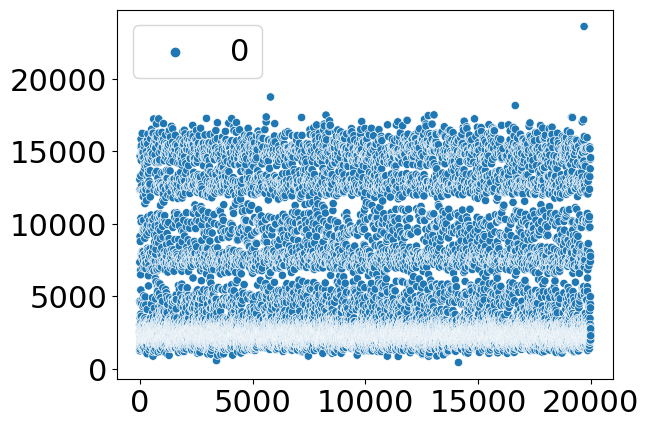

In [27]:
sns.scatterplot(df)

<Axes: >

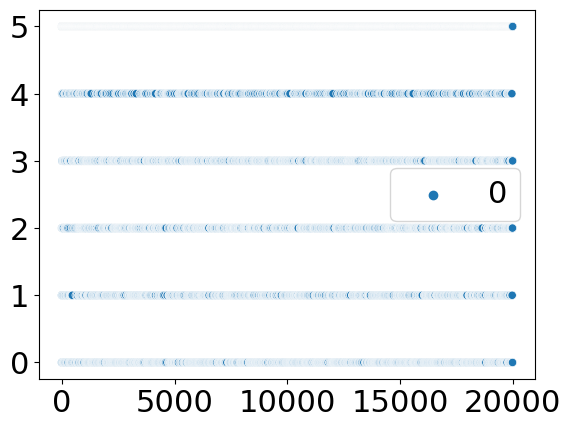

In [29]:
tmpY = Y.to_numpy().reshape(20000,1)
df = pd.DataFrame(tmpY)
sns.scatterplot(df)